# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Paul Braun

Datum: 18.11.2023

Gruppe: 18

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Wie hoch sind äußere Einflüsse und Versuchsdurchführung bei dieser Messung?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.

In einem Glas ist Wasser bei Raumtemperatur und ein Temperatursensor. In einer Tasse ist warmes Wasser und ebenfalls ein Temperatursensor. 


<img src="figures/Bild_heat_capacity.jpg" width="900">

## Versuchsauswertung

In [26]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib
import h5py as h5
import json
from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [30]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
path_hdf = "data/data_heat_capacity/data_heat_capacity.h5"

# DONE #

In [31]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
#with open(path) as json_file:
        #data = json.load(json_file)
path1 = "datasheets/sensor_1.json"
with open(path1) as json_file:
        sensor1 = json.load(json_file)

uuid1 = sensor1["JSON"]["ID"]

path2 = "datasheets/sensor_2.json"
with open(path2) as json_file:
        sensor1 = json.load(json_file)

uuid2 = sensor1["JSON"]["ID"]

with h5.File(path_hdf) as f: 
    time1 = f["RawData"][uuid1]["timestamp"][()]
    temp1 = f["RawData"][uuid1]["temperature"][()]
    temp2 = f["RawData"][uuid2]["temperature"][()]
f.close
time = time1 - min(time1)
# DONE #

#### (ii) Daten ploten

Text(0.5, 1.0, 'Plot der Temperatur des warmen und kalten Wassers über die Zeit')

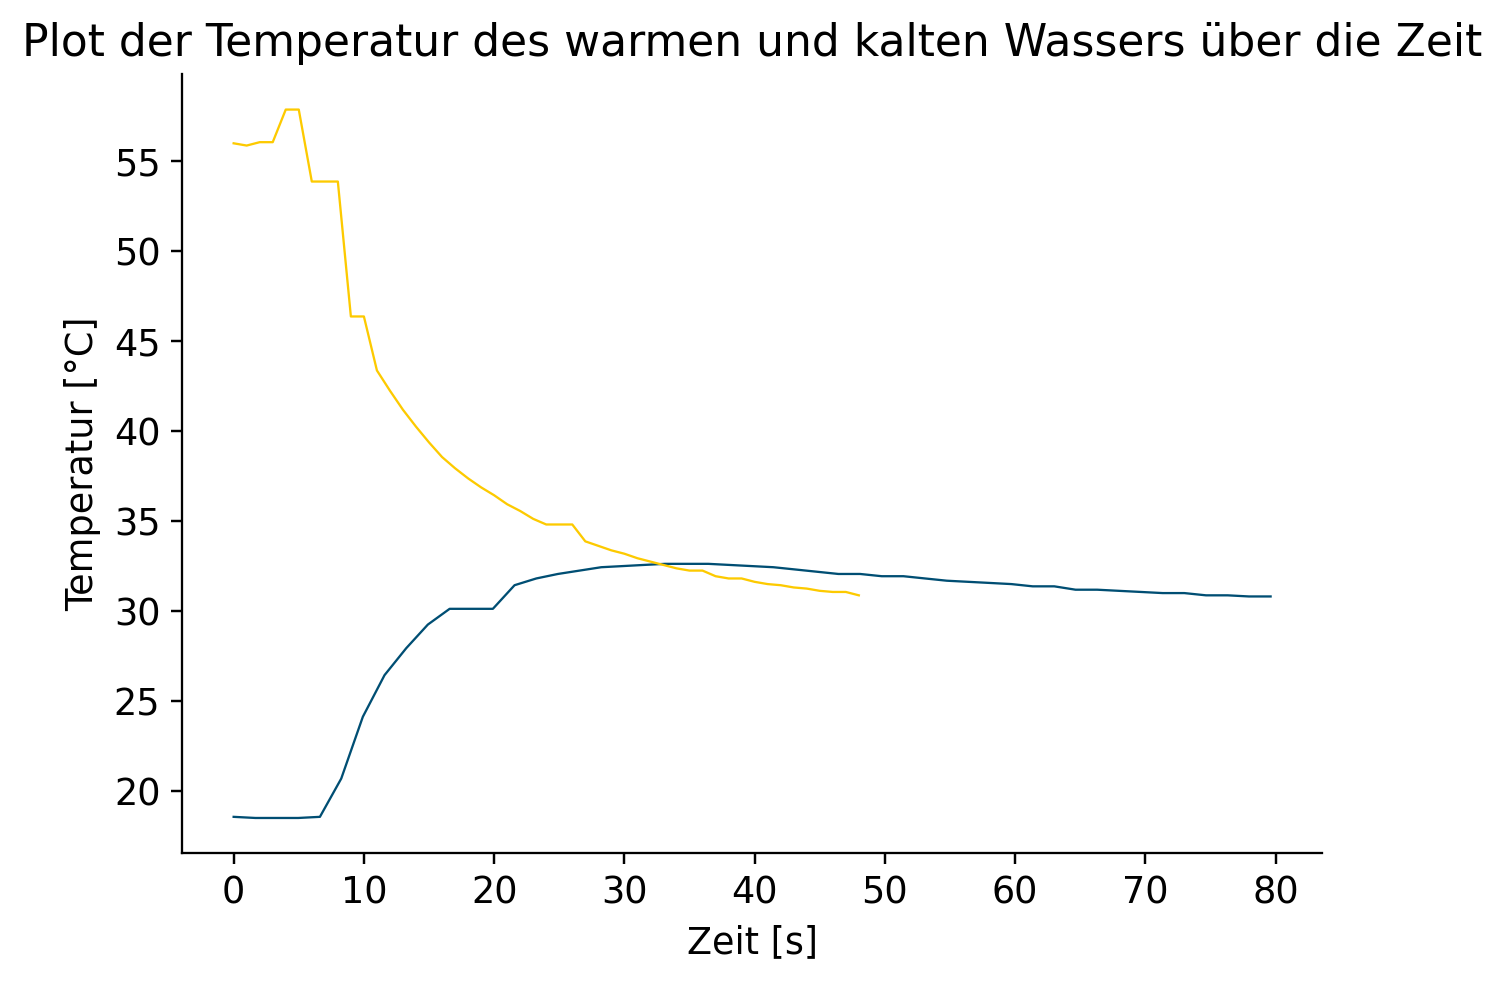

In [33]:
# TODO: Use the temperature and time data for plotting
#time = time - min(time)
x = time
y1 =temp1
y2 =temp2

plt.plot(x,y1,y2)
plt.xlabel("Zeit [s]")
plt.ylabel("Temperatur [°C]")
plt.title("Plot der Temperatur des warmen und kalten Wassers über die Zeit")
# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [41]:
# Heat capacity of Water
c_w = 4.18

# TODO: Read mass from the metadata of the experiment.
path_probe = "datasheets/probe_heat_capacity.json"
with open(path_probe) as json_file:
        probe = json.load(json_file)

m_g = int(probe["probe"]["mass"]) #masse aus json in g

m_add = 0.001 *m_g #Umerechnung in kg
m_cup = m_add
# DONE #

#### (iV) Anfangs- und Endwert der Temperatur

In [46]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity
T_M = temp1[-1]
T_1 = max(temp2)
T_2 = min(temp1)
print(T_2)
# DONE #

18.5


#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [47]:
# TODO: Calculate heat capacity of the calorimeter
C = (m_add*c_w*(T_2-T_1))/(T_M-T_1)-m_cup*c_w

# DONE #

#### (Vi) Ergebnis

In [48]:
# TODO: Print result
print(C, "J/K")

# DONE #

0.23771939953810617 J/K


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Im Graphen kann man recht gut das Schütten erkennen und wie beim Temperatursensor im warmen Wasser,durch das schütten, für kurze Zeiten keine Änderungen auftreten. 
Die laufende Heizung die den Raum noch leicht erwärmt hat sollte keinen Einfluss auf die Messung gehabt haben. Denn es ist kein kontinuierliches steigen der Temperatur zu beobachten, die vom Temperatursensor im kalten Wasser aufgezeichnet wurde. ABer auch bei zu letz erwähntem Sensor ist beim Schütten ein Haltepunkt zu erkennen. 

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

In [ ]:
-Eine gute praktische Einführung in wissenschaftliche Messungspraxis.
-Die Erkenntnis wie schwer es ist gute Forschuungsfragen zu stellen.